In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_fname = 'C:/Windows/Fonts/H2GTRM.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = font_family

In [2]:
car = pd.read_csv('CarData.csv')
car.head()

,CARMARK,PRICE,MILEAGE,REPAIR_1978,REPAIR_1977,HEADROOM,SEAT_CLARANCE,TRUNK,WEIGHT,LENGTH,DIAMETER,DISPLACEMENT,GEAR_RATIO,Company
0,AMC_Concord,4099,22,3,2,2.5,27.5,11,2930,186,40,121,3.58,1
1,AMC_Pacer,4749,17,3,1,3.0,25.5,11,3350,173,40,258,2.53,1
2,Audi_5000,9690,17,5,2,3.0,27.0,15,2830,189,37,131,3.20,3
3,Audi_Fox,6295,23,3,3,2.5,28.0,11,2070,174,36,97,3.70,3
4,BMW_320i,9735,25,4,4,2.5,26.0,12,2650,177,34,121,3.64,3


In [3]:
car.CARMARK.nunique()

66

In [4]:
car.Company.value_counts()

1    46
2    11
3     9
Name: Company, dtype: int64

In [5]:
car.drop(['CARMARK'], axis = 1, inplace = True)

LDA를 진행하기 위하여 CARMARK 변수 제거

Company가 1이면 USA, 2이면 Japan, 3이면 Europe

In [6]:
y = car['Company']
y = y.replace({1:'USA',2:'Japan',3:'Europe'})
y.head()
car['Company'] = y
car.head()

,PRICE,MILEAGE,REPAIR_1978,REPAIR_1977,HEADROOM,SEAT_CLARANCE,TRUNK,WEIGHT,LENGTH,DIAMETER,DISPLACEMENT,GEAR_RATIO,Company
0,4099,22,3,2,2.5,27.5,11,2930,186,40,121,3.58,USA
1,4749,17,3,1,3.0,25.5,11,3350,173,40,258,2.53,USA
2,9690,17,5,2,3.0,27.0,15,2830,189,37,131,3.20,Europe
3,6295,23,3,3,2.5,28.0,11,2070,174,36,97,3.70,Europe
4,9735,25,4,4,2.5,26.0,12,2650,177,34,121,3.64,Europe


In [7]:
car.shape

(66, 13)

예측변수는 12개 관측치는 66개

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(car.iloc[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
car_scaled = scaler.transform(car.iloc[:, :-1])

표준화 진행

1. 트레인셋, 테스트셋으로 나눠서 제일 정확한 모델로 예측  
2. plotting  
3. 분산 plotting
4. 어떤 변수가 가장 영향을 주었는지 - > boxplot vs 기존지식

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

In [13]:
X = car_scaled
X.shape

(66, 12)

In [14]:
y = car.Company
y.shape

(66,)

In [15]:
lda = LDA()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
# 30 fold Cross Validation

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    print('Accuracy is ' + str(accuracy_score(y_test, y_pred)) + ' random_state is {}'.format(i))

Accuracy is 0.85 random_state is 0
Accuracy is 0.9 random_state is 1
Accuracy is 0.9 random_state is 2
Accuracy is 0.85 random_state is 3
Accuracy is 0.85 random_state is 4
Accuracy is 0.95 random_state is 5
Accuracy is 0.85 random_state is 6
Accuracy is 1.0 random_state is 7
Accuracy is 0.85 random_state is 8
Accuracy is 0.9 random_state is 9
Accuracy is 0.85 random_state is 10
Accuracy is 0.85 random_state is 11
Accuracy is 0.9 random_state is 12
Accuracy is 0.65 random_state is 13
Accuracy is 0.8 random_state is 14
Accuracy is 0.8 random_state is 15
Accuracy is 0.9 random_state is 16
Accuracy is 0.85 random_state is 17
Accuracy is 0.85 random_state is 18
Accuracy is 0.75 random_state is 19
Accuracy is 0.85 random_state is 20
Accuracy is 0.9 random_state is 21
Accuracy is 0.85 random_state is 22
Accuracy is 0.8 random_state is 23
Accuracy is 0.85 random_state is 24
Accuracy is 0.95 random_state is 25
Accuracy is 0.75 random_state is 26
Accuracy is 0.8 random_state is 27
Accuracy is 0

random_state가 7일때 정확도가 제일 높다

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
lda.fit(X_train, y_train)
y_pred = lda.predict(X)

In [19]:
cm = confusion_matrix(y, y_pred)
pd.DataFrame(cm, index = ['실제 Europe', '실제 Japan', '실제 USA'], columns = ['예측 Europe', '예측 Japan', '예측 USA'])

,예측 Europe,예측 Japan,예측 USA
실제 Europe,9,0,0
실제 Japan,1,10,0
실제 USA,0,2,44


In [20]:
lda.priors_

array([0.15217391, 0.15217391, 0.69565217])

In [21]:
X2 = lda.fit(X, y).transform(X)
X2 = pd.DataFrame(X2)
X2['pred y'] = y_pred
X2['true y'] = y
X2.rename({0: 'LD1', 1: 'LD2'}, axis = 'columns', inplace = True)
X2.head()

,LD1,LD2,pred y,true y
0,-0.872570,1.387029,USA,USA
1,1.889963,1.310063,USA,USA
2,-4.658897,2.177453,Europe,Europe
3,-3.284698,0.253594,Europe,Europe
4,-3.507121,-0.296751,Europe,Europe


Project data to maximize class separation.

In [22]:
pd.DataFrame(np.round(lda.coef_,2), columns = car.columns[:-1])

,PRICE,MILEAGE,REPAIR_1978,REPAIR_1977,HEADROOM,SEAT_CLARANCE,TRUNK,WEIGHT,LENGTH,DIAMETER,DISPLACEMENT,GEAR_RATIO
0,4.11,-1.22,3.03,-3.56,-1.41,1.40,3.39,-5.17,1.20,-1.64,-0.76,4.26
1,1.07,-1.50,1.07,1.58,0.58,-0.81,-1.82,-4.22,2.51,-1.37,1.22,1.54
2,-1.06,0.60,-0.85,0.32,0.14,-0.08,-0.23,2.02,-0.83,0.65,-0.14,-1.20


In [23]:
lda.priors_

array([0.13636364, 0.16666667, 0.6969697 ])

In [24]:
pd.DataFrame(np.round(lda.means_,2), columns = car.columns[:-1])

,PRICE,MILEAGE,REPAIR_1978,REPAIR_1977,HEADROOM,SEAT_CLARANCE,TRUNK,WEIGHT,LENGTH,DIAMETER,DISPLACEMENT,GEAR_RATIO
0,0.37,0.50,0.70,-0.32,-0.47,0.21,0.02,-0.91,-0.85,-1.01,-0.97,1.20
1,-0.35,0.85,1.14,1.22,-0.60,-1.04,-1.09,-1.01,-0.97,-1.19,-0.97,0.96
2,0.01,-0.30,-0.41,-0.23,0.24,0.21,0.26,0.42,0.40,0.48,0.42,-0.46


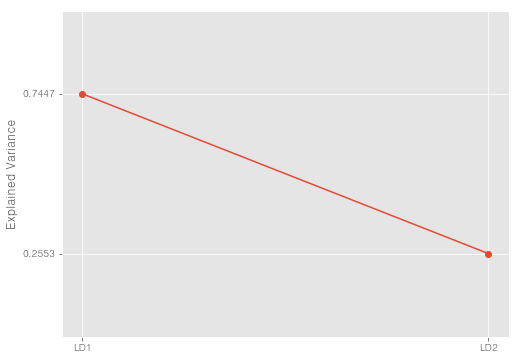

In [25]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
lambdas = lda.explained_variance_ratio_
plt.plot(range(1,3), lambdas, marker = 'o')
plt.ylabel('Explained Variance')
plt.ylim((0, 1))
plt.xticks(ticks = [1,2], labels = ['LD1','LD2'])
plt.yticks(ticks = lambdas)
plt.show()

In [26]:
pd.DataFrame(np.round(lda.predict_proba(X_train), 2), columns = lda.classes_)

,Europe,Japan,USA
0,0.00,0.00,1.00
1,0.00,0.00,1.00
2,0.00,1.00,0.00
3,0.00,0.00,1.00
4,0.00,0.00,1.00
5,0.00,0.00,1.00
6,0.00,0.00,1.00
7,0.00,0.00,1.00
8,0.00,0.50,0.50
9,0.00,1.00,0.00


In [27]:
mean = pd.DataFrame(np.round(lda.means_,2), columns = car.columns[:-1], index = lda.classes_)
mean[['PRICE','WEIGHT','GEAR_RATIO','TRUNK','REPAIR_1977']]

,PRICE,WEIGHT,GEAR_RATIO,TRUNK,REPAIR_1977
Europe,0.37,-0.91,1.20,0.02,-0.32
Japan,-0.35,-1.01,0.96,-1.09,1.22
USA,0.01,0.42,-0.46,0.26,-0.23


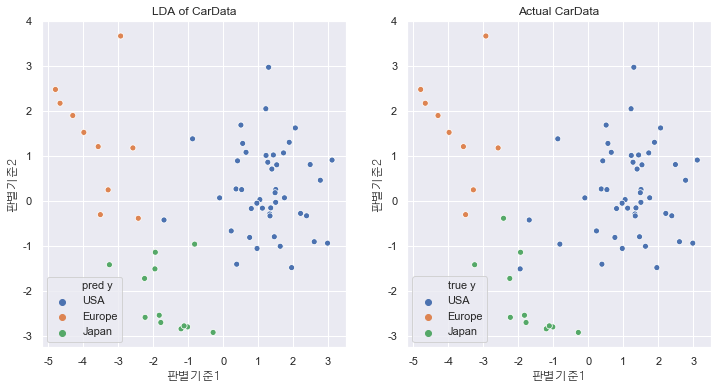

In [28]:
sns.set()
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x = X2['LD1'].values, y = X2['LD2'].values, data = X2, hue = 'pred y')
plt.title('LDA of CarData')
plt.xlabel('판별기준1', fontdict = {'family' : font_family})
plt.ylabel('판별기준2', fontdict = {'family' : font_family})
plt.subplot(1,2,2)
sns.scatterplot(x = X2['LD1'].values, y = X2['LD2'].values, data = X2, hue = 'true y')
plt.title('Actual CarData')
plt.xlabel('판별기준1', fontdict = {'family' : font_family})
plt.ylabel('판별기준2', fontdict = {'family' : font_family})
plt.show()

LD1이 작으면 유럽 일본 미국 순으로 분류    
LD2가 작으면 일본 미국 유럽 순으로 분류 근데 LD2는 구분능력이 좀 구린거같음

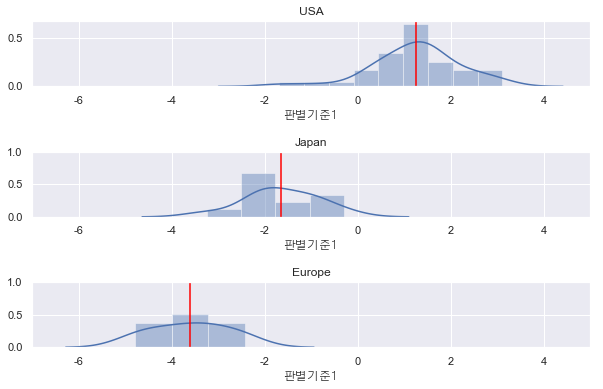

In [29]:
plt.figure(figsize = (10, 6))
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(3,1,1)
plt.xlim(-7,5)
sns.distplot(X2[X2['pred y'] == 'USA']['LD1'])
plt.axvline(X2[X2['pred y'] == 'USA']['LD1'].mean(), color = 'red')
plt.title('USA')
plt.xlabel('판별기준1', fontdict = {'family' : font_family})
plt.subplot(3,1,2)
plt.title('Japan')
sns.distplot(X2[X2['pred y'] == 'Japan']['LD1'])
plt.axvline(X2[X2['pred y'] == 'Japan']['LD1'].mean(), color = 'red')
plt.xlim((-7,5))
plt.ylim((0,1))
plt.xlabel('판별기준1', fontdict = {'family' : font_family})
plt.subplot(3,1,3)
plt.title('Europe')
sns.distplot(X2[X2['pred y'] == 'Europe']['LD1'])
plt.axvline(X2[X2['pred y'] == 'Europe']['LD1'].mean(), color = 'red')
plt.xlim((-7,5))
plt.ylim((0,1))
plt.xlabel('판별기준1', fontdict = {'family' : font_family})
plt.show()

In [30]:
pd.DataFrame(lda.scalings_[:,0], index = car.columns[:-1], columns = ['LD1'])

,LD1
PRICE,-0.975757
MILEAGE,0.460333
REPAIR_1978,-0.760838
REPAIR_1977,0.480878
HEADROOM,0.197342
SEAT_CLARANCE,-0.162275
TRUNK,-0.412998
WEIGHT,1.644413
LENGTH,-0.603669
DIAMETER,0.526950


LD1에 가장 영향을 주는 변수는 3개만 꼽자면 가격, 무게, 기어비  
즉 가격이 비쌀수록, 무게가 가벼울수록, 기어변속비가 좋을 수록 유럽 일본 미국순으로 비교한다는 것

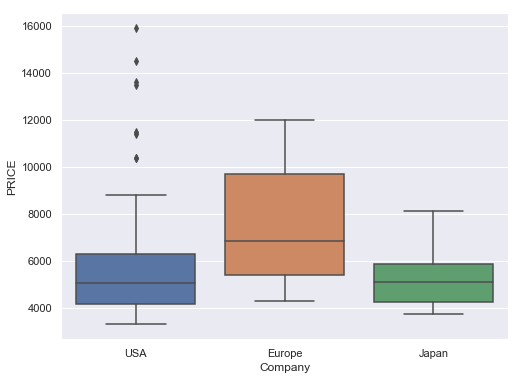

In [31]:
sns.set()
plt.figure(figsize = (8,6))
sns.boxplot(data = car,  x = 'Company', y = 'PRICE' )
plt.show()

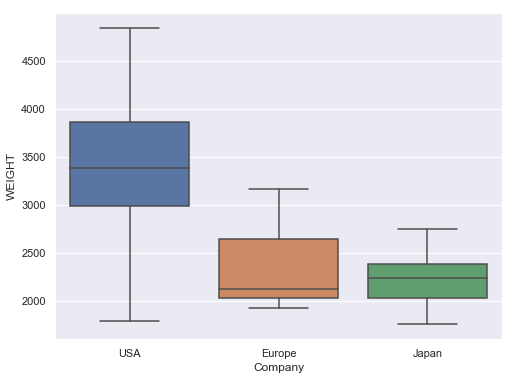

In [32]:
plt.figure(figsize = (8,6))
sns.boxplot(data = car,  x = 'Company', y = 'WEIGHT' )
plt.show()


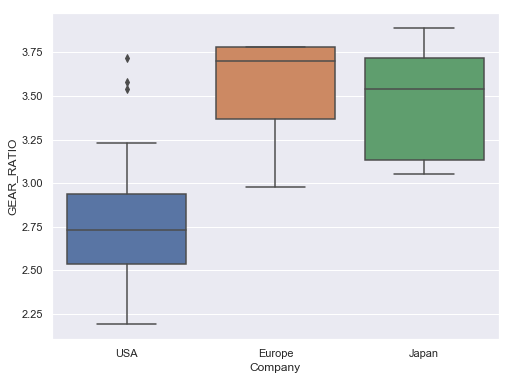

In [33]:
plt.figure(figsize = (8,6))
sns.boxplot(data = car,  x = 'Company', y = 'GEAR_RATIO' )
plt.show()

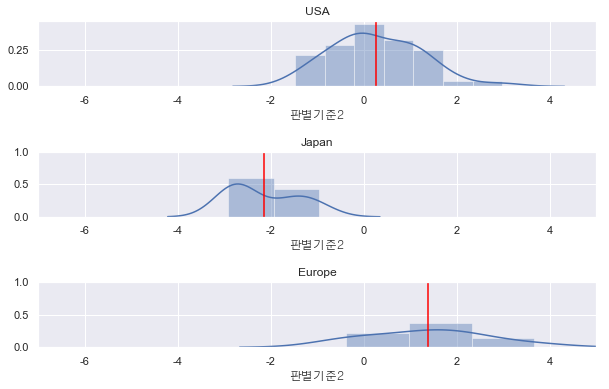

In [34]:
plt.figure(figsize = (10, 6))
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(3,1,1)
plt.xlim(-7,5)
sns.distplot(X2[X2['pred y'] == 'USA']['LD2'])
plt.axvline(X2[X2['pred y'] == 'USA']['LD2'].mean(), color = 'red')
plt.title('USA')
plt.xlabel('판별기준2', fontdict = {'family' : font_family})
plt.subplot(3,1,2)
plt.title('Japan')
sns.distplot(X2[X2['pred y'] == 'Japan']['LD2'])
plt.axvline(X2[X2['pred y'] == 'Japan']['LD2'].mean(), color = 'red')
plt.xlim((-7,5))
plt.ylim((0,1))
plt.xlabel('판별기준2', fontdict = {'family' : font_family})
plt.subplot(3,1,3)
plt.title('Europe')
sns.distplot(X2[X2['pred y'] == 'Europe']['LD2'])
plt.axvline(X2[X2['pred y'] == 'Europe']['LD2'].mean(), color = 'red')
plt.xlim((-7,5))
plt.ylim((0,1))
plt.xlabel('판별기준2', fontdict = {'family' : font_family})
plt.show()

In [35]:
pd.DataFrame(lda.scalings_[:,1], index = car.columns[:-1], columns = ['LD2'])

,LD2
PRICE,0.299387
MILEAGE,0.318807
REPAIR_1978,0.123860
REPAIR_1977,-1.124494
HEADROOM,-0.429904
SEAT_CLARANCE,0.506032
TRUNK,1.178672
WEIGHT,0.617810
LENGTH,-0.672824
DIAMETER,0.206627


TRUNK가 작을 수록, REPAIR 1997년 점수가 높을 수록 일본 미국 유럽 순으로 분류

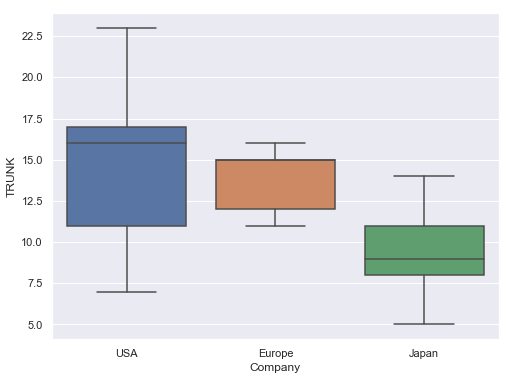

In [36]:
plt.figure(figsize = (8,6))
sns.boxplot(data = car,  x = 'Company', y = 'TRUNK' )
plt.show()

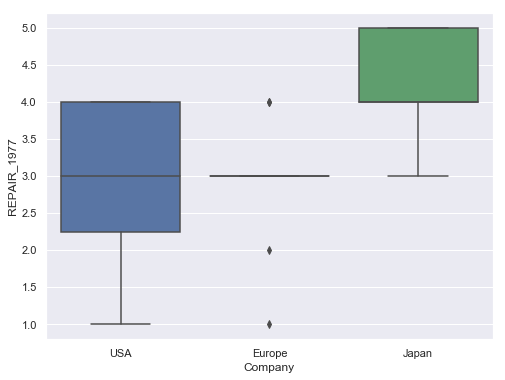

In [37]:
plt.figure(figsize = (8,6))
sns.boxplot(data = car,  x = 'Company', y = 'REPAIR_1977' )
plt.show()